In [10]:
from pathlib import Path

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [ ]:
def plot_pwv_for_date(
    date,
    data_dir="data/src/",
    file_template="PWV_flow_._{year}_{month:02d}_.nc",
    central_lon=-160,
    cmap='jet',
    vmin=0,
    vmax=60,
    contour_step=10
):
    """
    Строит карту PWV для заданной даты, открывая только файл нужного месяца.
    date: строка с названием файла для разметки, например "PWV_2012-01-01_0000"
    data_dir: каталог, где лежат файлы NetCDF
    file_template: шаблон имени файла с плейсхолдерами {year} и {month}
    Остальные параметры настраивают визуализацию.
    """
    # Парсинг даты
    date = date[4:].replace("_", " ")
    date[:-2] + ":" + date[-2:]
    ts = pd.to_datetime(date)
    year = ts.year
    month = ts.month

    # Формирование пути к файлу по шаблону
    pattern = file_template.format(year=year, month=month)
    file_path = Path(data_dir, pattern)
    print(f"Input timestamp: {ts}")

    # Открытие одного файла
    ds = xr.open_dataset(file_path)
    ds = ds.sortby('lon')

    # Выбор ближайшего временного среза
    slice_ = ds['PWV'].sel(timestamp=np.datetime64(ts), method='nearest')
    print(f"Founded slice with timestamp: {slice_.timestamp.values}")

    # Построение карты
    plt.figure(figsize=(20, 9))
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=central_lon))
    slice_.T.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        cbar_kwargs={'label': 'PWV (kg/m²)'}
    )
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    ax.set_title(f'PWV for {ts.strftime("%Y-%m-%d %H:%M")}')

    # Добавление изолиний
    levels = np.arange(vmin, vmax + contour_step, contour_step)
    contours = plt.contour(
        slice_.lon,
        slice_.lat,
        slice_.T.squeeze(),
        levels=levels,
        colors='#222222',
        linewidths=0.3,
        transform=ccrs.PlateCarree()
    )
    plt.clabel(contours, inline=True, fontsize=8, fmt='%d')
    plt.show()


Input timestamp: 2012-01-01 00:00:00
Founded slice with timestamp: 2012-01-01T00:00:00.000000000


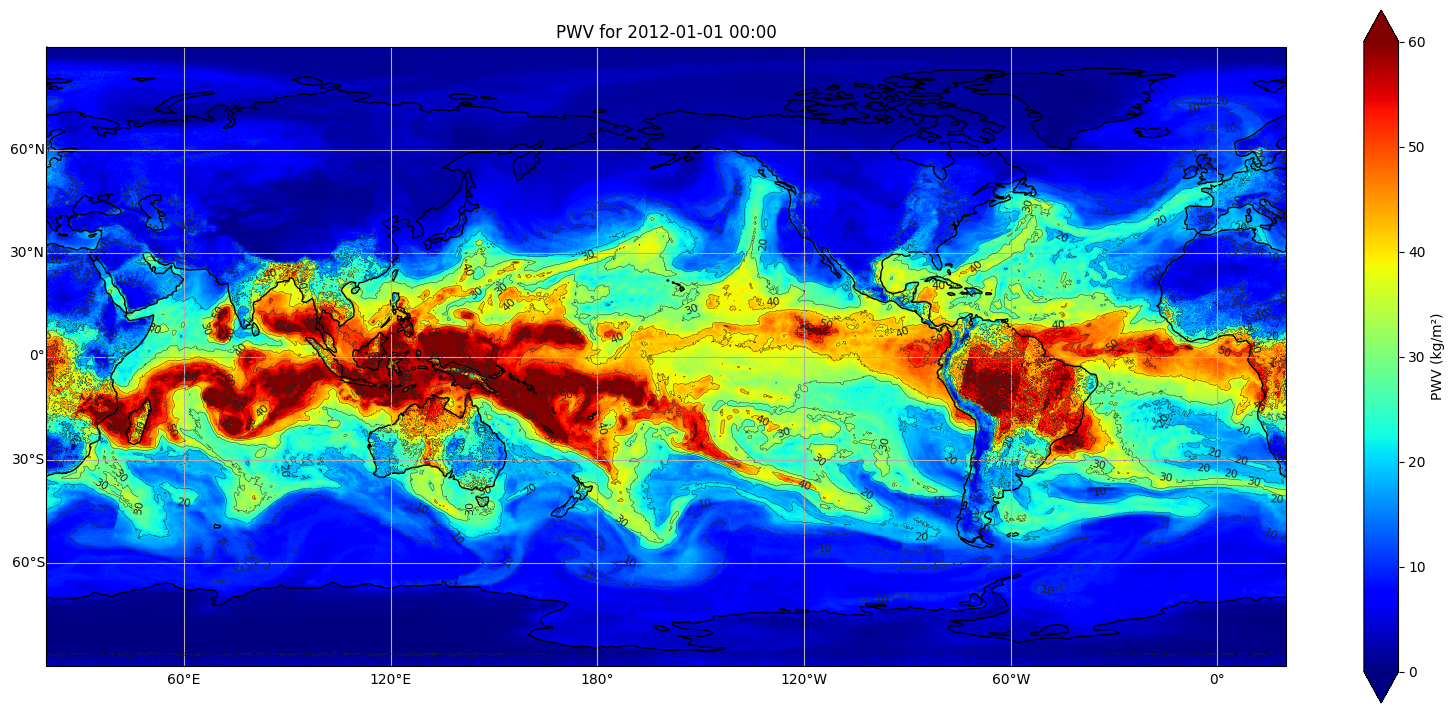

In [13]:
plot_pwv_for_date("PWV_2012-01-01_0000")